# Avocado Project

Project Description

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into
a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units)
and price. Retail scan data comes directly from retailers’ cash registers based on actual 
retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. 
Multi-outlet reporting includes an aggregation of the following channels: grocery, mass,
club, drug, dollar and military. The Average Price (of avocados) in the table reflects a 
per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties
of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:
    
- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 

Dataset Link-

•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Avocado/avocado.csv.zip


In [62]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [16]:
df = pd.read_csv("avocado.csv")

In [17]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [18]:
# let us drop irrelevant column
df.drop('Unnamed: 0', inplace = True, axis = 1)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [19]:
df.shape

(18249, 13)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


- we can see that Date column has object datatype. we need to replace it with datetime
- There are no null values 

In [21]:
# change Date column datatype to datetime

df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'].dtypes)

datetime64[ns]


In [22]:
# rename the 4046, 4225, 4770 
df = df.rename(columns = {
    '4046': 'PLU 4046',
    '4225': 'PLU 4225',
    '4770': 'PLU 4770'
})

df.head(2)

,Date,AveragePrice,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


In [23]:
# extract month from Date column and drop Date column

df['Month'] = df['Date'].dt.month
df.drop(['Date'],inplace = True, axis = 1)
df.head(2)

,AveragePrice,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12


# Data Visualization

# Univariate analysis 

In [26]:
# seperate numeric features and categorical features 

num_features = df.select_dtypes(exclude = ['object'])
num_features.head(2)

,AveragePrice,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12


<Axes: xlabel='AveragePrice', ylabel='Count'>

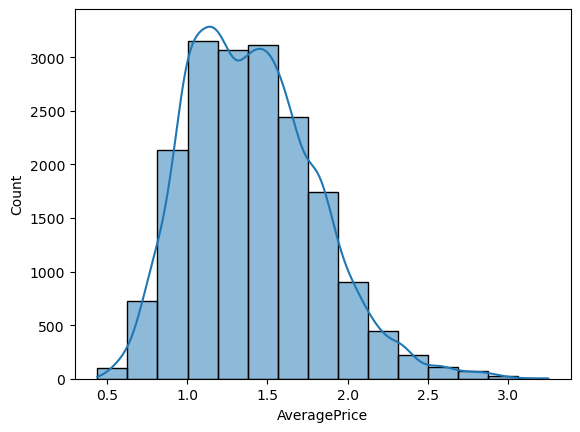

In [35]:
sns.histplot(x='AveragePrice',data=df,kde=True, bins = 15 )

In [29]:
num_features.describe()

,AveragePrice,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000


<Axes: xlabel='Total Volume', ylabel='Count'>

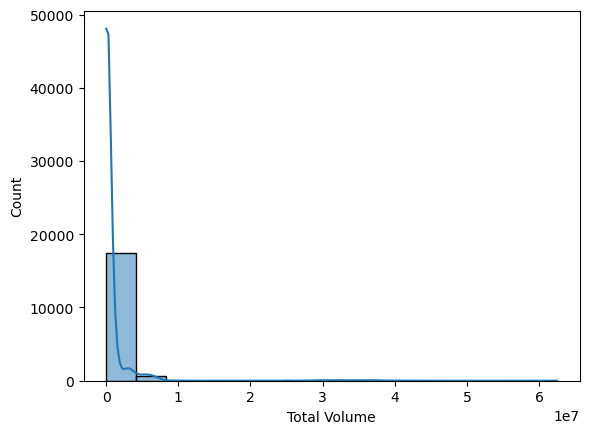

In [36]:
sns.histplot(x='Total Volume',data=df,kde=True, bins = 15 )

In [43]:
# let us create a total price column

df['Price_Volume'] = df['AveragePrice'] * df['Total Volume']
df.head(2)

,AveragePrice,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Price_Volume
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,85434.7046
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,74083.9230


In [48]:
df['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

# Data Visualization

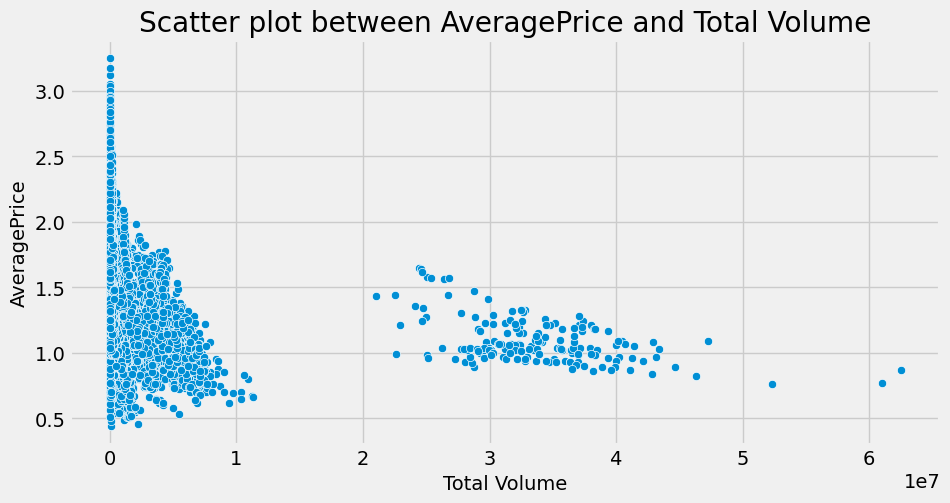

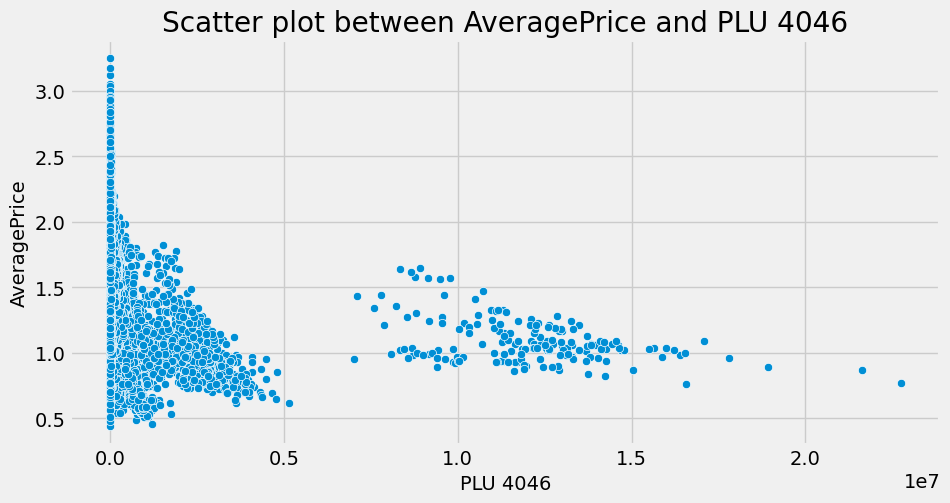

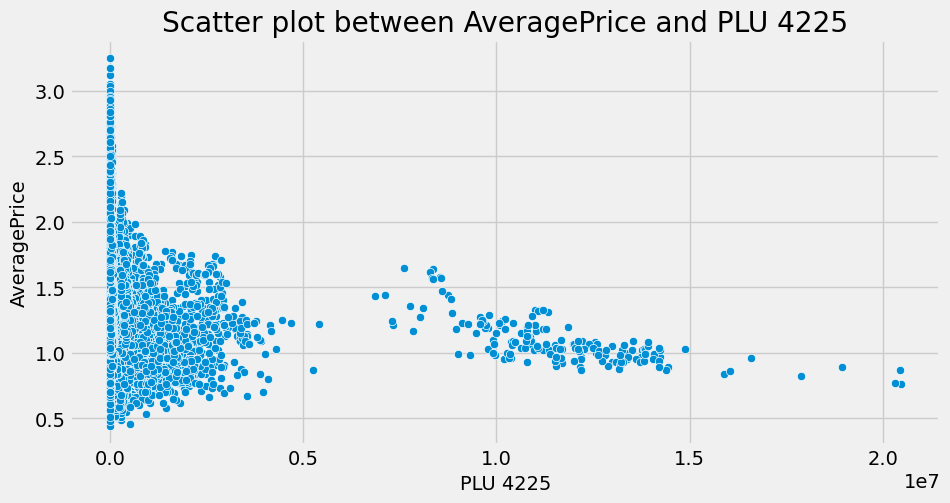

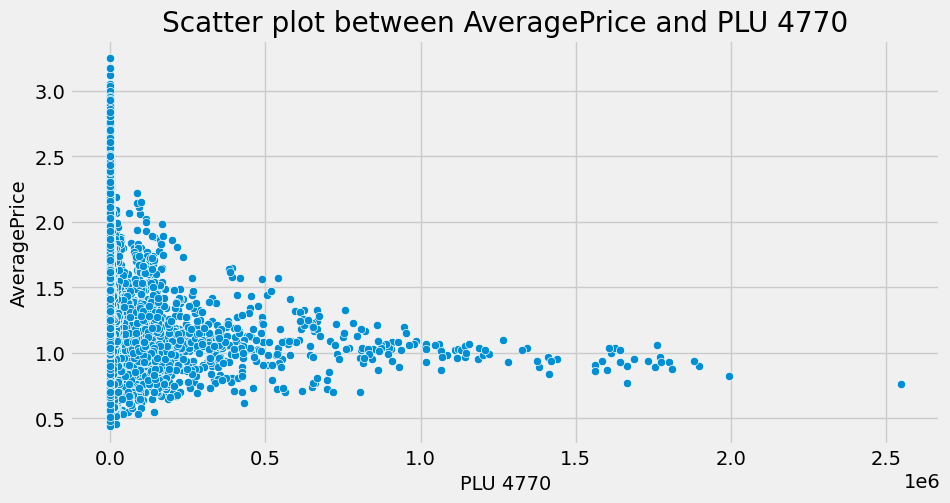

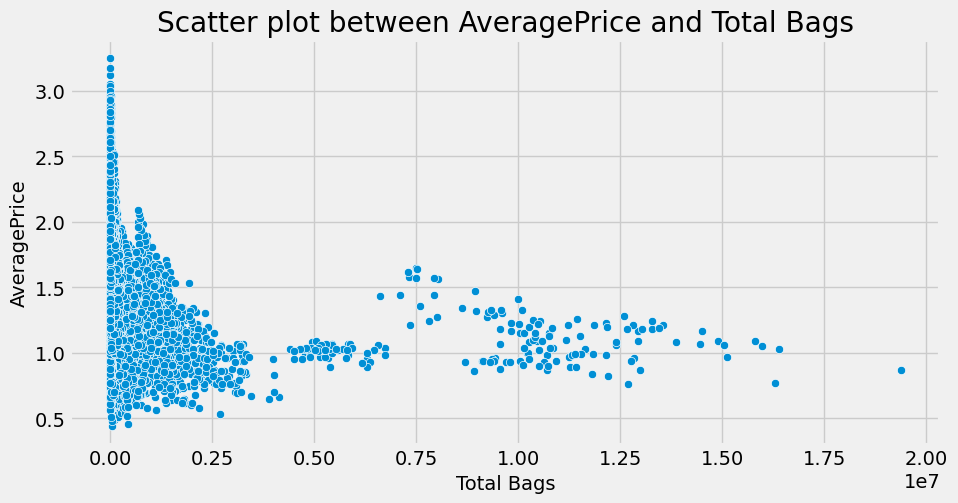

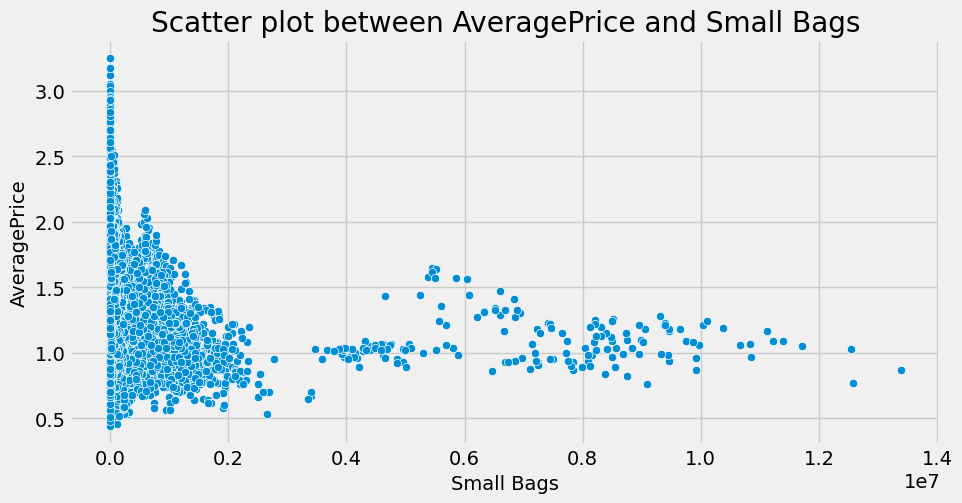

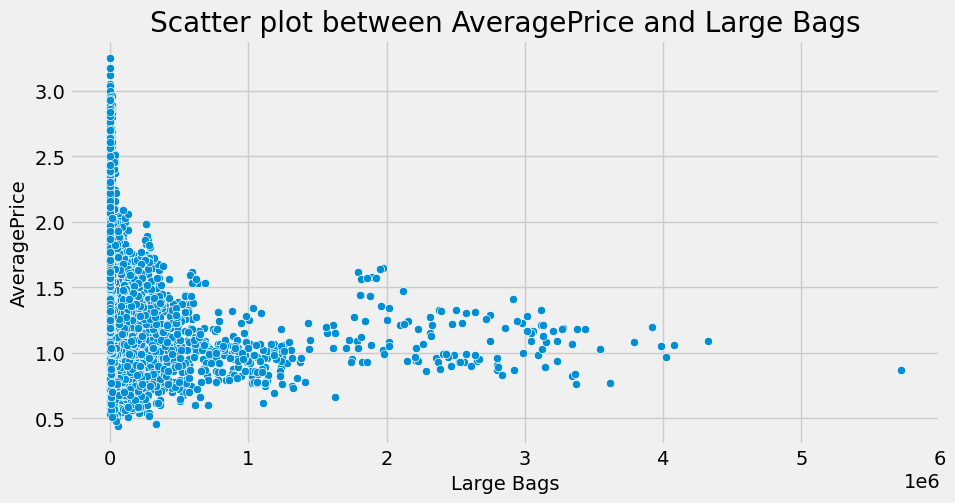

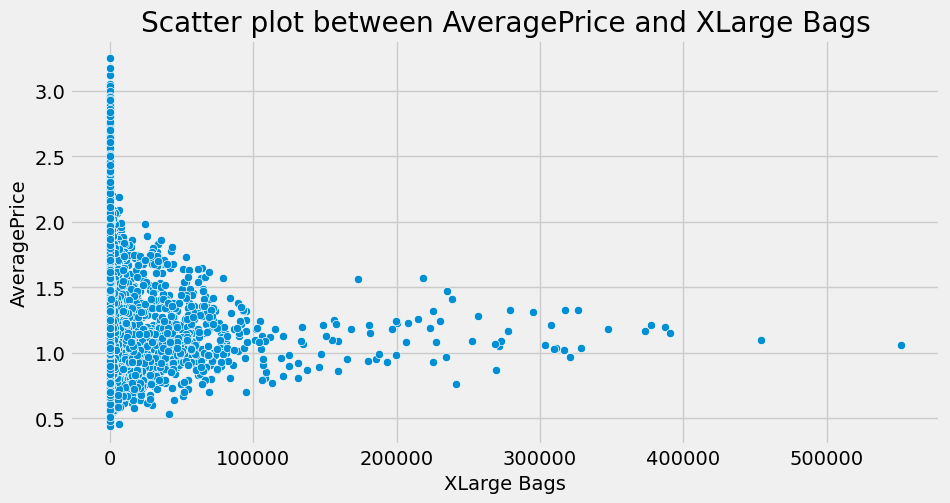

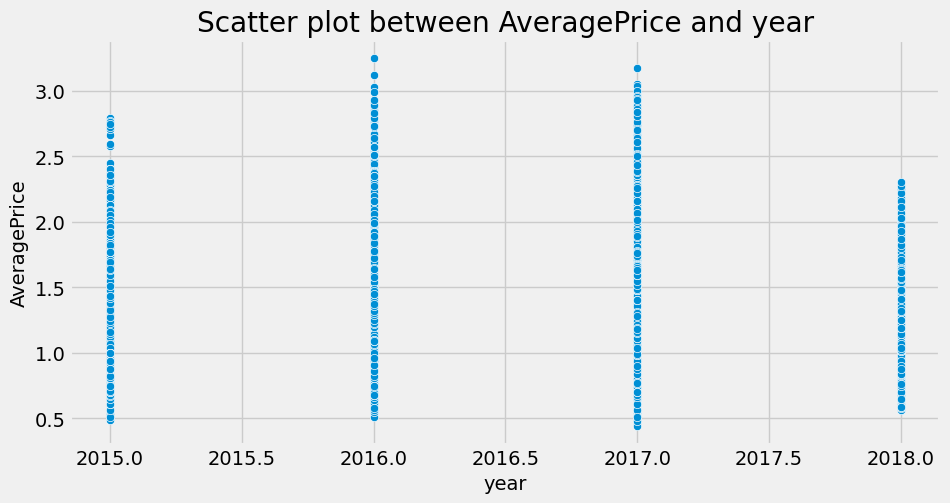

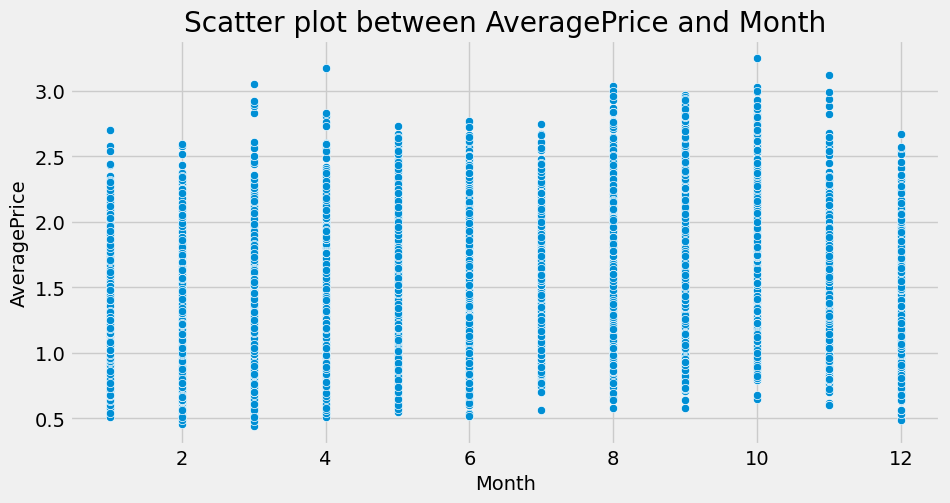

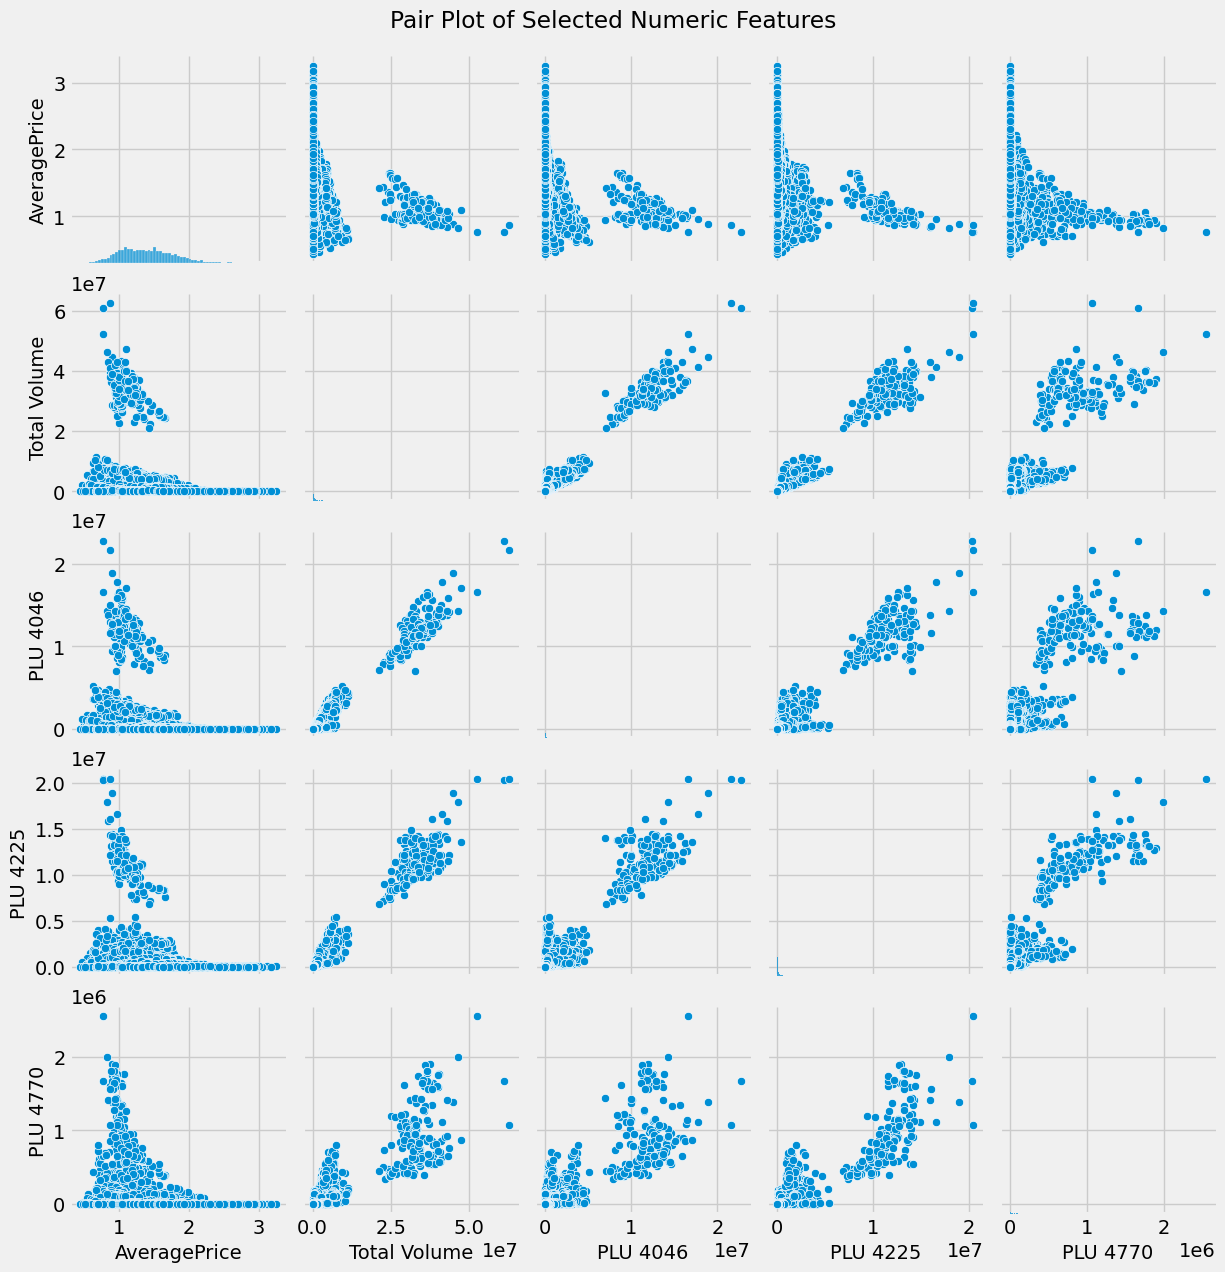

In [54]:
# Scatter plot between 'AveragePrice' and other numeric features
for feature in num_features:
    if feature != 'AveragePrice':
        plt.figure(figsize=(10, 5))
        sns.scatterplot(x=df[feature], y=df['AveragePrice'])
        plt.title(f"Scatter plot between AveragePrice and {feature}")
        plt.show()

# Pair plot of a subset of numeric features
subset_features = ['AveragePrice', 'Total Volume', 'PLU 4046', 'PLU 4225', 'PLU 4770']
sns.pairplot(df[subset_features])
plt.suptitle("Pair Plot of Selected Numeric Features", y=1.02)
plt.show()


Average Price by Region:
region
Houston                1.047929
DallasFtWorth          1.085592
SouthCentral           1.101243
CincinnatiDayton       1.209201
Nashville              1.212101
LosAngeles             1.216006
Denver                 1.218580
PhoenixTucson          1.224438
Roanoke                1.247929
Columbus               1.252781
WestTexNewMexico       1.261701
West                   1.272219
Detroit                1.276095
Louisville             1.286686
RichmondNorfolk        1.291331
NewOrleansMobile       1.304793
Indianapolis           1.313994
Portland               1.317722
TotalUS                1.319024
Atlanta                1.337959
GreatLakes             1.338550
Boise                  1.348136
Pittsburgh             1.364320
LasVegas               1.380917
California             1.395325
Southeast              1.398018
SanDiego               1.398166
SouthCarolina          1.403284
Midsouth               1.404763
Tampa                  1.408846
MiamiFt

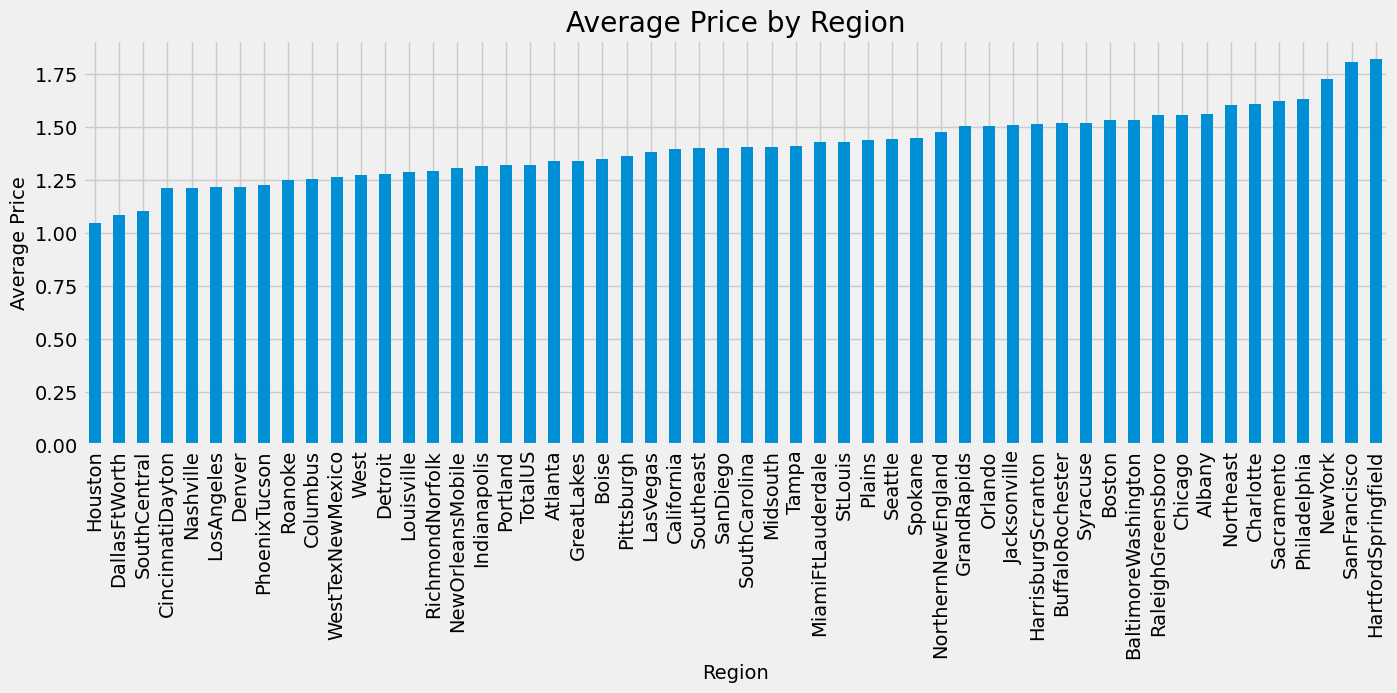

In [57]:
# Group by 'region' and compute the mean of 'AveragePrice'
region_avg_price = df.groupby('region')['AveragePrice'].mean().sort_values()
print("\nAverage Price by Region:")
print(region_avg_price)

# Plot the average price by region
plt.figure(figsize=(15, 5))
region_avg_price.plot(kind='bar')
plt.title("Average Price by Region")
plt.xlabel("Region")
plt.ylabel("Average Price")
plt.show()

In [58]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['type', 'region'], drop_first=True)

In [59]:
# Define features (X) and target (y) for regression
X_reg = df.drop('AveragePrice', axis=1)
y_reg = df['AveragePrice']

In [63]:
# Split the data for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Model Selection 

In [72]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix

In [69]:
# Linear Regression model
lr = LinearRegression()
lr.fit(X_train_reg,y_train_reg)
y_pred_reg = lr.predict(X_test_reg)

In [70]:
mse = mean_squared_error(y_test_reg,y_pred_reg)
print("Linear Regression MSE :", mse)

Linear Regression MSE : 0.0059495017006232515


In [74]:
# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_reg,y_train_reg)
dt_y_pred_reg = dt_model.predict(X_test_reg)

dt_mse = mean_squared_error(y_test_reg, dt_y_pred_reg)
print(f"Decision Tree Mean Squared Error: {dt_mse}")

Decision Tree Mean Squared Error: 0.025034438356164382


In [76]:
# Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_reg,y_train_reg)
rf_y_pred_reg = rf_model.predict(X_test_reg)
rf_mse = mean_squared_error(y_test_reg, rf_y_pred_reg)
print(f"Random Forest Mean Squared Error: {rf_mse}")

Random Forest Mean Squared Error: 0.010085856906849315


In [77]:
# Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_reg,y_train_reg)
gb_y_pred_reg = gb_model.predict(X_test_reg)
gb_mse = mean_squared_error(y_test_reg, gb_y_pred_reg)
print(f"Gradient Boosting Mean Squared Error: {gb_mse}")

Gradient Boosting Mean Squared Error: 0.04800845235364836


# For classification problem

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [82]:
# Load the dataset
df_clf = pd.read_csv('avocado.csv')
df_clf.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [84]:
# Convert 'Date' column to datetime
df_clf['Date'] = pd.to_datetime(df_clf['Date'])

# Extract year, month, and day from the 'Date' column
df_clf['Year'] = df_clf['Date'].dt.year
df_clf['Month'] = df_clf['Date'].dt.month
df_clf['Day'] = df_clf['Date'].dt.day

In [85]:
# Drop the original 'Date' column
df_clf.drop(columns=['Date'], inplace=True)

In [86]:
# Create the new column 'Price_Volume'
df_clf['Price_Volume'] = df_clf['AveragePrice'] * df_clf['Total Volume']

In [87]:
# Encode the 'type' column
df_clf = pd.get_dummies(df_clf, columns=['type'], drop_first=True)

In [88]:
# Extract the target variable 'region' and encode it
le = LabelEncoder()
df_clf['region'] = le.fit_transform(df_clf['region'])

In [89]:
# Define features (X) and target (y)
X_clf = df_clf.drop('region', axis=1)
y_clf= df_clf['region']

In [90]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Model Selection

In [92]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [93]:
y_pred_clf = clf.predict(X_test)

In [94]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_clf)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9191780821917809


By using RandomForestClassifier we get an accuracy of 91%.